In [ ]:
import numpy as np
from astropy.modeling import models, fitting
import matplotlib.pyplot as plt
from pathlib import Path
from astropy.io import fits
from astropy.wcs import WCS
import os
import scipy.stats as stats
import json
import pandas as pd
from fitsutil import *
from bc_imaging_analysis import imaging_analysis
from xraysky.scripts import events_imaging


This one is for windows

In [ ]:
eventPath = Path(
    r"Z:/Astro_BlackCAT\BlackCAT_Calibration_Data\LC_Calibration_Data\y2024-12-12\BC057_Ti_FF_233_HORI_0_0\Analysis\imaging_analysis_20241213\combined_events_th1_200.fits.gz"
)
d = fits.open(eventPath)

In [ ]:
eventPath = Path(
    r"/mnt/z/Astro_BlackCAT/BlackCAT_Calibration_Data/LC_Calibration_Data/y2024-12-12/BC057_Ti_FF_233_HORI_0_0/Analysis/imaging_analysis_20241213/combined_events_th1_200.fits.gz"
)
d = fits.open(eventPath)
cols = d[1].columns

In [ ]:
print(type(d))

In [26]:
noiseShelf, signal = splitEventList(d,700,"sum")

In [27]:
a,b = halfEventList(signal)

In [28]:
random_a = random_sample_events_list(a,500)
random_b = random_sample_events_list(b,1000)

In [ ]:
noise = np.array(noiseShelf.data)


In [29]:
random_a.data = np.append(a.data,noiseShelf.data)
print(len(a.data))

43141


In [30]:
SampleHDU = fits.BinTableHDU.from_columns(cols)
random_a.columns = cols
random_a.writeto("/home/laurel/astro/testing/test.fits.gz",overwrite=True)


In [ ]:
imaging_analysis("/home/laurel/astro/testing/test.fits.gz",source = "Ti")

Found 1 peak(s)


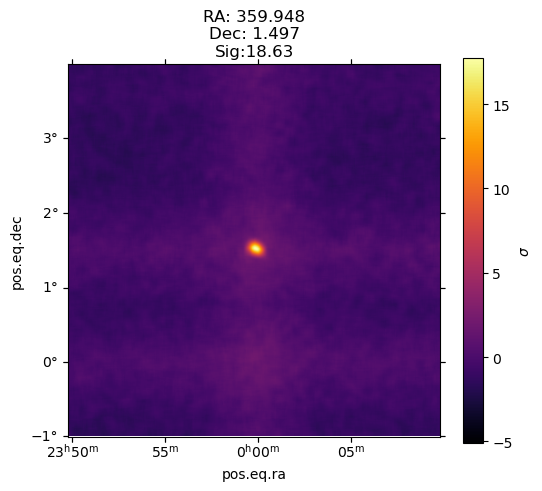

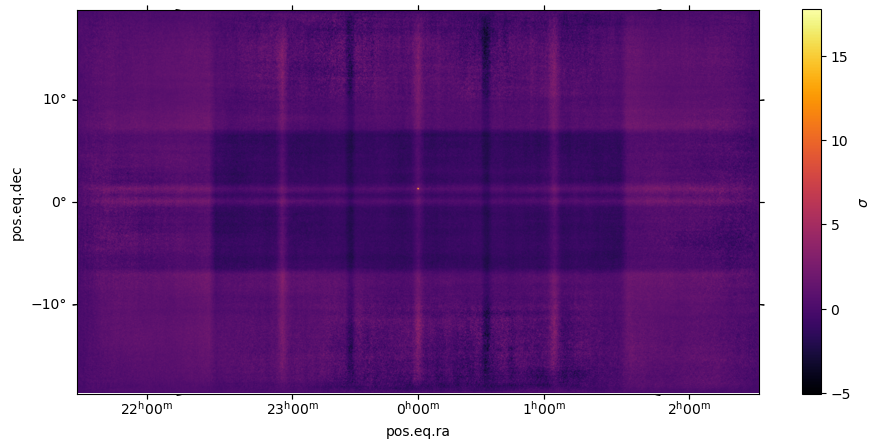

In [31]:
imager= events_imaging.BC_Imaging()
imageOut = imager.evtlist2image(
    "/home/laurel/astro/testing/test.fits.gz","/home/laurel/astro/testing/test_reconstruct.fits.gz"
)
imager.plotSource(imageOut)